In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits

digits = load_digits()

<Figure size 432x288 with 0 Axes>

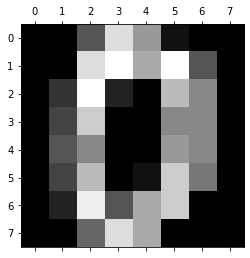

In [7]:
import pylab as pl 
pl.gray() 
pl.matshow(digits.images[0]) 
pl.show()

In [9]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

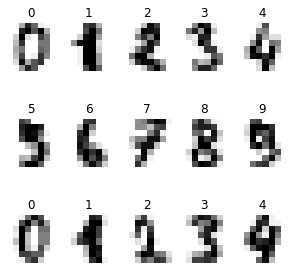

In [57]:
images_and_labels = list(zip(digits.images, digits.target))
plt.figure(figsize=(5, 5))
for index, (image,label) in enumerate(images_and_labels[:15]):
    plt.subplot(3, 5, index+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('%i' % label)
    

In [26]:
import random
from sklearn import ensemble
from sklearn import svm
from sklearn.model_selection import train_test_split
#variables
n_samples = len(digits.images)
x = digits.images.reshape((n_samples, -1))
y = digits.target
classifier = ensemble.RandomForestClassifier()
# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.5, shuffle=False)

# We learn the digits on the first half of the digits
classifier.fit(X_train, y_train)

# Now predict the value of the digit on the second half:
predicted = classifier.predict(X_test)

score=classifier.score(X_test, y_test)
print('Random Tree Classifier:\n' )
print('Score\t'+str(score))




Random Tree Classifier:

Score	0.9310344827586207


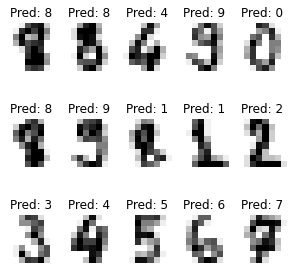

In [60]:
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
plt.figure(figsize=(5, 5))
for index, (image,label) in enumerate(images_and_predictions[:15]):
    plt.subplot(3, 5, index+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Pred: %i' % label)

Classification report for classifier RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        88
           1       0.93      0.87      0.90        91
           2       0.99      0.91      0.95        86
           3       0.91      0.86      0.88        91
           4       0.97      0.95      0.96        92
           5       0.91      0.95      0.92        91
           6       0.98      0.99   

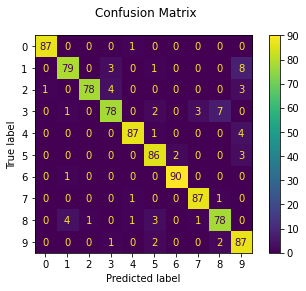

In [27]:
from sklearn import metrics

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

plt.show()